In [1]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
lab3_quant = CmdStanModel(stan_file = '/home/Code_lab3.stan')


INFO:cmdstanpy:compiling stan file /home/Code_lab3.stan to exe file /home/Code_lab3
INFO:cmdstanpy:compiled model executable: /home/Code_lab3


In [3]:
samples = lab3_quant.sample( fixed_param=True, 
                            iter_sampling=1000)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [4]:
df = samples.draws_pd()
df

,lp__,accept_stat__,N,p,y
0,0.0,0.0,50.0,0.157668,3.0
1,0.0,0.0,50.0,0.035379,1.0
2,0.0,0.0,50.0,0.161748,6.0
3,0.0,0.0,50.0,0.532455,25.0
4,0.0,0.0,50.0,0.157193,7.0
...,...,...,...,...,...
995,0.0,0.0,50.0,0.147321,14.0
996,0.0,0.0,50.0,0.245143,16.0
997,0.0,0.0,50.0,0.302025,13.0
998,0.0,0.0,50.0,0.253378,13.0


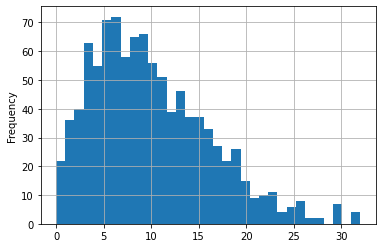

In [8]:
df['y'].plot.hist(bins = 33)
plt.grid()
plt.show()

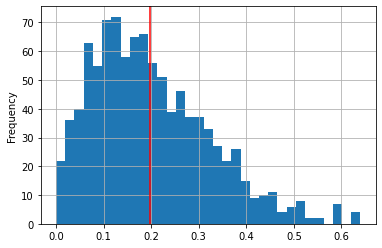

0.19666000000000003


In [14]:
df['ratio'] = df['y'] / 50
df.head()
mean_ratio = np.mean(df['ratio'])
df['ratio'].plot.hist(bins = 33)
plt.axvline(mean_ratio, color='red')
plt.grid()
plt.show()
print(mean_ratio)

In [23]:
lab3_quant_2 = CmdStanModel(stan_file = '/home/Code_lab3_2.stan')

INFO:cmdstanpy:compiling stan file /home/Code_lab3_2.stan to exe file /home/Code_lab3_2
INFO:cmdstanpy:compiled model executable: /home/Code_lab3_2


In [25]:
samples2 = lab3_quant_2.sample( data={'N':50, 'y':7},
                                fixed_param=True, 
                                iter_sampling=1000)
df2 = samples2.draws_pd()
df2

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,p,y_pred
0,0.0,0.0,0.794232,42.0
1,0.0,0.0,0.794232,40.0
2,0.0,0.0,0.794232,46.0
3,0.0,0.0,0.794232,38.0
4,0.0,0.0,0.794232,39.0
...,...,...,...,...
995,0.0,0.0,0.794232,46.0
996,0.0,0.0,0.794232,40.0
997,0.0,0.0,0.794232,41.0
998,0.0,0.0,0.794232,44.0


In [26]:
df2['ratio'] = df2['y_pred'] / 50
df2.head()

,lp__,accept_stat__,p,y_pred,ratio
0,0.0,0.0,0.794232,42.0,0.84
1,0.0,0.0,0.794232,40.0,0.80
2,0.0,0.0,0.794232,46.0,0.92
3,0.0,0.0,0.794232,38.0,0.76
4,0.0,0.0,0.794232,39.0,0.78


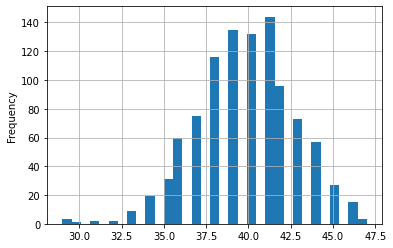

In [27]:
df2['y_pred'].plot.hist(bins = 33)
plt.grid()
plt.show()

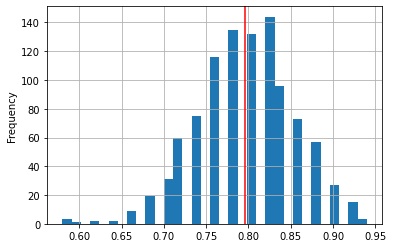

0.7957600000000001


In [28]:
mean_ratio = np.mean(df2['ratio'])
df2['ratio'].plot.hist(bins = 33)
plt.axvline(mean_ratio, color='red')
plt.grid()
plt.show()
print(mean_ratio)

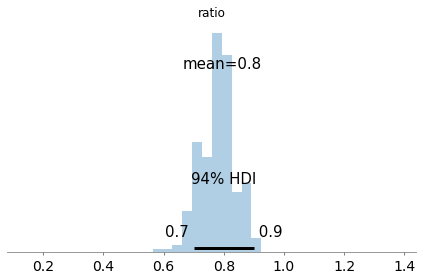

In [37]:
import arviz as az 
az.plot_posterior(df2['ratio'].to_numpy(), kind='hist', hdi_prob=0.94, point_estimate='mean')
plt.title("ratio")
plt.tight_layout()
plt.show()